# [Taller 2b] Métodos iterativos

[Repositorio](https://github.com/keyaru18/TallerMetodosIterativos.git)

Grafique la trayectoria de los siguientes sistemas de ecuaciones:

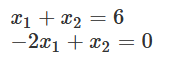

Prueba 3 posiciones iniciales, encuentre una en la que diverge el sistema.

---
## Método de Gauss-Jacobi

In [1]:
import numpy as np

def gauss_jacobi(A, b, max_iterations=100, tolerance=1e-6):
    n = len(A)
    x = np.zeros(n)
    x_prev = np.zeros(n)
    iteration = 0

    D = np.diag(np.diag(A))
    L_U = A - D
    D_inv = np.linalg.inv(D)

    while iteration < max_iterations:
        x_prev = x.copy()
        x = np.dot(D_inv, b - np.dot(L_U, x_prev))

        # Check for convergence
        if np.linalg.norm(x - x_prev, np.inf) < tolerance:
            break

        iteration += 1

    return x

# Example usage:
A = np.array([[1, 1],
              [-2, 1]])
b = np.array([6, 0])

solution = gauss_jacobi(A, b)
print("Solution using Gauss-Jacobi Method:", solution)

Solution using Gauss-Jacobi Method: [-2.25179981e+15 -4.50359963e+15]


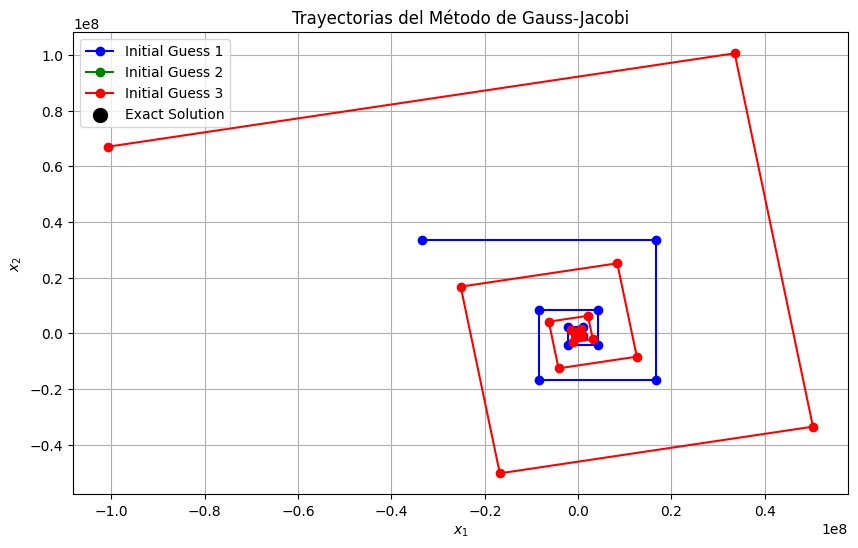

Posición inicial 1:
Última iteración: [-33554430  33554436]
Distancia al punto exacto: 47453132.81212578
----------------------------------------
Posición inicial 2:
Última iteración: [2 4]
Distancia al punto exacto: 0.0
----------------------------------------
Posición inicial 3:
Última iteración: [-100663294   67108868]
Distancia al punto exacto: 120982225.09506969
----------------------------------------


In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Definición del sistema
def gauss_jacobi_iteration(x, b):
    """
    Iteración del método de Gauss-Jacobi para el sistema dado.
    """
    x1, x2 = x
    x1_new = 6 - x2
    x2_new = 2 * x1
    return np.array([x1_new, x2_new])

# Parámetros
max_iterations = 50
tolerance = 1e-6

# Vector b
b = np.array([6, 0])

# Probar tres posiciones iniciales
initial_guesses = [
    np.array([3, 3]),  # Posición inicial 1
    np.array([2, 4]),  # Posición inicial 2
    np.array([5, 2]) # Posición inicial 3
]

# Lista para almacenar trayectorias
trajectories = []

for initial_guess in initial_guesses:
    x = initial_guess.copy()
    trajectory = [x.copy()]
    
    for _ in range(max_iterations):
        x = gauss_jacobi_iteration(x, b)
        trajectory.append(x.copy())
    
    trajectories.append(np.array(trajectory))

# Graficar las trayectorias
plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'red']

for i, traj in enumerate(trajectories):
    plt.plot(traj[:, 0], traj[:, 1], marker='o', color=colors[i], label=f'Initial Guess {i+1}')
    plt.scatter(traj[0, 0], traj[0, 1], color=colors[i], s=100, alpha=0.7)

# Punto exacto de solución
solution = np.linalg.solve(np.array([[1, 1], [-2, 1]]), b)
plt.scatter(solution[0], solution[1], color='black', s=100, label='Exact Solution')

# Etiquetas y leyenda
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Trayectorias del Método de Gauss-Jacobi')
plt.legend()
plt.grid(True)
plt.show()

# Analizar convergencia/divergencia
for i, traj in enumerate(trajectories):
    print(f"Posición inicial {i+1}:")
    print("Última iteración:", traj[-1])
    print("Distancia al punto exacto:", np.linalg.norm(traj[-1] - solution))
    print("-" * 40)

--- 
## Gauss-Seidel


In [12]:
import numpy as np

def gauss_seidel(A, b, x0, max_iter=100, tol=1e-6):
    n = len(A)
    x = x0.copy()

    for it in range(max_iter):
        x_prev = x.copy()

        for i in range(n):
            sum1 = np.dot(A[i, :i], x[:i])     # Términos ya actualizados
            sum2 = np.dot(A[i, i+1:], x_prev[i+1:])  # Términos aún no actualizados
            x[i] = (b[i] - sum1 - sum2) / A[i, i]

        # Verificar convergencia
        if np.linalg.norm(x - x_prev, ord=np.inf) < tol:
            print(f"Convergió en {it+1} iteraciones.")
            break
    else:
        print("No convergió en el número máximo de iteraciones.")

    return x

# =============================
# === Sistema de ecuaciones ===
# =============================
# Sistema:
# x1 + x2 = 6
# -2x1 + x2 = 0

A = np.array([
    [1, 1],
    [-2, 1]
], dtype=float)

b = np.array([6, 0], dtype=float)

# Adivinación inicial
x0 = np.array([0.0, 0.0])

# Resolver
solucion = gauss_seidel(A, b, x0)

# Mostrar solución
print("Solución:")
print(f"x1 = {solucion[0]}")
print(f"x2 = {solucion[1]}")

No convergió en el número máximo de iteraciones.
Solución:
x1 = -2.5353012004564585e+30
x2 = -5.070602400912917e+30



Prueba con posición inicial: [2. 4.]
Convergió en 1 iteraciones.
Última iteración: [2. 4.]
Distancia a la solución exacta: 0.0000

Prueba con posición inicial: [2. 3.]
No convergió en el número máximo de iteraciones.
Última iteración: [-5.62949953e+14 -1.12589991e+15]
Distancia a la solución exacta: 1258794363780394.0000

Prueba con posición inicial: [-1. -3.]
No convergió en el número máximo de iteraciones.
Última iteración: [-3.94064967e+15 -7.88129935e+15]
Distancia a la solución exacta: 8811560546462758.0000


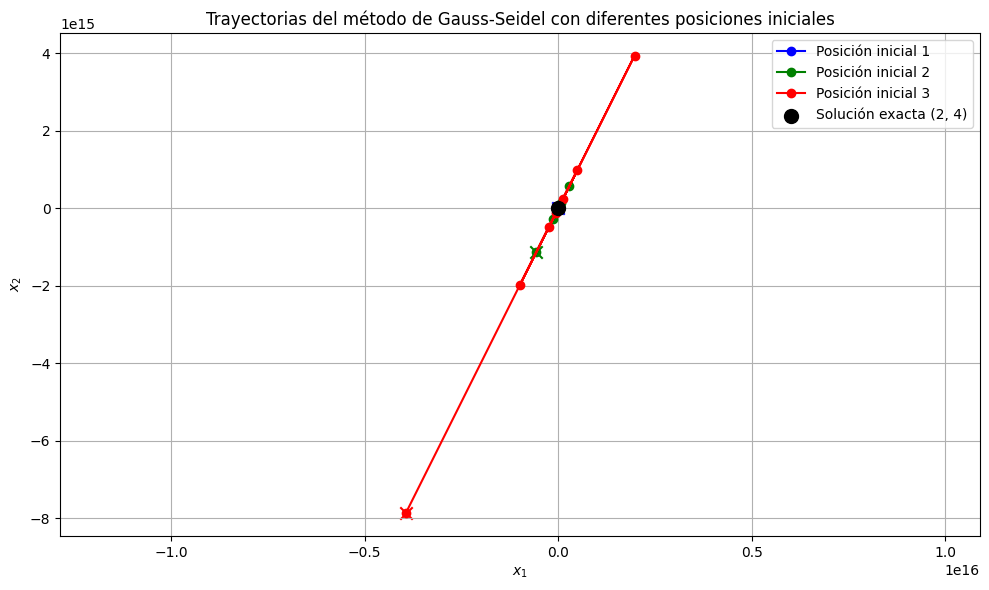

In [23]:
import numpy as np

def gauss_seidel(A, b, x0, max_iter=50, tol=1e-6):
    """
    Método de Gauss-Seidel para resolver Ax = b.
    Retorna la trayectoria de iteraciones.
    """
    n = len(A)
    x = x0.copy()
    trayectoria = [x.copy()]

    for it in range(max_iter):
        x_prev = x.copy()

        for i in range(n):
            sum1 = np.dot(A[i, :i], x[:i])     # Valores ya actualizados
            sum2 = np.dot(A[i, i+1:], x[i+1:]) # Valores aún no actualizados
            x[i] = (b[i] - sum1 - sum2) / A[i, i]

        trayectoria.append(x.copy())

        # Verificar convergencia
        if np.linalg.norm(x - x_prev, ord=np.inf) < tol:
            print(f"Convergió en {it+1} iteraciones.")
            break
    else:
        print("No convergió en el número máximo de iteraciones.")

    return np.array(trayectoria)

# =============================
# === Sistema de ecuaciones ===
# =============================
A = np.array([[1, 1],
              [-2, 1]], dtype=float)

b = np.array([6, 0], dtype=float)

# Solución exacta
x_exacta = np.linalg.solve(A, b)

# Posiciones iniciales a probar
initial_guesses = [
    np.array([2.0, 4.0]),   # Posición inicial 1
    np.array([2.0, 3.0]),   # Posición inicial 2
    np.array([-1.0, -3.0])    # Posición inicial 3
]

# Máximo de iteraciones
max_iter = 50

# Almacenar trayectorias
trayectorias = []

for x0 in initial_guesses:
    print(f"\nPrueba con posición inicial: {x0}")
    trayectoria = gauss_seidel(A, b, x0, max_iter=max_iter)
    trayectorias.append(trayectoria)

    # Mostrar última iteración y distancia al punto exacto
    ultima_iter = trayectoria[-1]
    distancia = np.linalg.norm(ultima_iter - x_exacta)
    print(f"Última iteración: {ultima_iter}")
    print(f"Distancia a la solución exacta: {distancia:.4f}")

# =============================
# === Graficar trayectorias ===
# =============================
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

colores = ['blue', 'green', 'red']
labels = ['Posición inicial 1', 'Posición inicial 2', 'Posición inicial 3']

for i, tray in enumerate(trayectorias):
    plt.plot(tray[:, 0], tray[:, 1], '-o', color=colores[i], label=labels[i])
    plt.scatter(tray[0, 0], tray[0, 1], color=colores[i], s=80)  # Punto inicial
    plt.scatter(tray[-1, 0], tray[-1, 1], color=colores[i], s=80, marker='x')  # Punto final

# Punto exacto
plt.scatter(x_exacta[0], x_exacta[1], color='black', s=100, label='Solución exacta (2, 4)', zorder=5)

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Trayectorias del método de Gauss-Seidel con diferentes posiciones iniciales')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.tight_layout()
plt.show()